In [21]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
from itertools import permutations

In [9]:
df = pd.read_excel('fake_cities4.xlsx')
data = list(df.to_records(index=False))

In [3]:
df

,City_id,X,Y,Population
0,1,20.201549,52.824184,1568818
1,2,22.926474,52.110554,1637902
2,3,16.849968,49.437353,650715
3,4,21.874644,51.004260,1736267
4,5,16.810748,50.427237,1181010
...,...,...,...,...
695,696,16.011432,50.805608,1270816
696,697,16.611255,51.801909,1374094
697,698,20.442781,49.143153,512955
698,699,14.953345,53.297974,1385684


In [7]:
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def create_distance_matrix(coordinates):
    n = len(coordinates)
    distance_matrix = [[0] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i][j] = calculate_distance(coordinates[i], coordinates[j])
    
    return distance_matrix

In [5]:
# distance_matrix = create_distance_matrix(selected_coordinates)

In [60]:
# %%time
# def simulated_annealing(data, temperature, cooling_rate):
#     # Inicjalizacja losowego rozwiązania początkowego
#     current_solution = [random.choice(data) for _ in range(10)]
#     current_score = calculate_score(current_solution)

#     best_solution = current_solution
#     best_score = current_score

#     while temperature > 0.1:
#         # Generowanie nowego sąsiada
#         neighbor_solution = current_solution.copy()
#         index = random.randint(0, len(neighbor_solution) - 1)
#         neighbor_solution[index] = random.choice(data)
#         neighbor_score = calculate_score(neighbor_solution)

#         # Akceptacja lub odrzucenie nowego rozwiązania
#         if neighbor_score > current_score:
#             current_solution = neighbor_solution
#             current_score = neighbor_score
#         else:
#             probability = math.exp((neighbor_score - current_score) / temperature)
#             if random.random() < probability:
#                 current_solution = neighbor_solution
#                 current_score = neighbor_score

#         # Aktualizacja najlepszego rozwiązania
#         if current_score > best_score:
#             best_solution = current_solution
#             best_score = current_score

#         # Obniżenie temperatury
#         temperature *= cooling_rate

#     return best_solution

def calculate_score(solution):
    selected_points = [point[0] for point in solution]
    selected_coordinates = [(point[1], point[2]) for point in solution]

    population = sum(
        (1 / (calculate_distance(data[i][1], data[i][2], data[j][1], data[j][2])**2 + 1e-6)) * data[i][3]
        for i in range(len(data)) for j in range(len(data)) if i != j and data[i][0] in selected_points and data[j][0] in selected_points
    )

    return population

# # Ustawienia algorytmu
# initial_temperature = 1000.0
# cooling_rate = 0.95

# # Wywołanie algorytmu wyrzażania
# best_solution = simulated_annealing(data, initial_temperature, cooling_rate)

# # Wyświetlenie wyników
# print("Wybrane punkty:")
# for point in best_solution:
#     print("Punkt:", point[0])
#     print("Współrzędne (X, Y):", point[1], point[2])


In [61]:
%%time
def check_minimum_distance(solution, min_distance):
    for i in range(len(solution)):
        for j in range(i+1, len(solution)):
            distance = calculate_distance(solution[i][1], solution[i][2], solution[j][1], solution[j][2])
            if distance < min_distance:
                return False
    return True

def simulated_annealing(data, temperature, cooling_rate, min_distance):
    current_solution = [random.choice(data) for _ in range(10)]
    current_score = calculate_score(current_solution)

    best_solution = current_solution
    best_score = current_score

    while temperature > 0.1:
        neighbor_solution = current_solution.copy()
        index = random.randint(0, len(neighbor_solution) - 1)
        neighbor_solution[index] = random.choice(data)

        if check_minimum_distance(neighbor_solution, min_distance):
            neighbor_score = calculate_score(neighbor_solution)

            if neighbor_score > current_score:
                current_solution = neighbor_solution
                current_score = neighbor_score
            else:
                probability = math.exp((neighbor_score - current_score) / temperature)
                if random.random() < probability:
                    current_solution = neighbor_solution
                    current_score = neighbor_score

            if current_score > best_score:
                best_solution = current_solution
                best_score = current_score

        temperature *= cooling_rate

    return best_solution

# Ustawienia algorytmu
initial_temperature = 1000.0
cooling_rate = 0.95
minimum_distance = 0.5

# Wywołanie algorytmu wyrzażania
best_solution = simulated_annealing(data, initial_temperature, cooling_rate, minimum_distance)

# Wyświetlenie wyników
print("Wybrane punkty:")
for point in best_solution:
    print("Punkt:", point[0])
    print("Współrzędne (X, Y):", point[1], point[2])


Wybrane punkty:
Punkt: 504
Współrzędne (X, Y): 16.11817892330799 51.46891382602072
Punkt: 693
Współrzędne (X, Y): 17.28172354461134 52.81061812139904
Punkt: 479
Współrzędne (X, Y): 15.66773051825032 52.57014022575453
Punkt: 422
Współrzędne (X, Y): 15.6398992484498 53.52999399448173
Punkt: 140
Współrzędne (X, Y): 16.7033086740962 51.25816696293717
Punkt: 639
Współrzędne (X, Y): 14.83601875189825 53.23588219326581
Punkt: 477
Współrzędne (X, Y): 16.11399218258721 52.03733351353736
Punkt: 618
Współrzędne (X, Y): 16.45386677689014 52.7676505862603
Punkt: 581
Współrzędne (X, Y): 16.28166692624107 53.36159878414311
Punkt: 208
Współrzędne (X, Y): 14.21189040029567 52.86381964609848
CPU times: total: 1min 4s
Wall time: 1min 4s


In [63]:
# best_solution

In [64]:
selected_points = [i[0] for i in best_solution]
# selected_points

In [65]:
selected_coordinates = [[i[1], i[2]] for i in best_solution]
# selected_coordinates

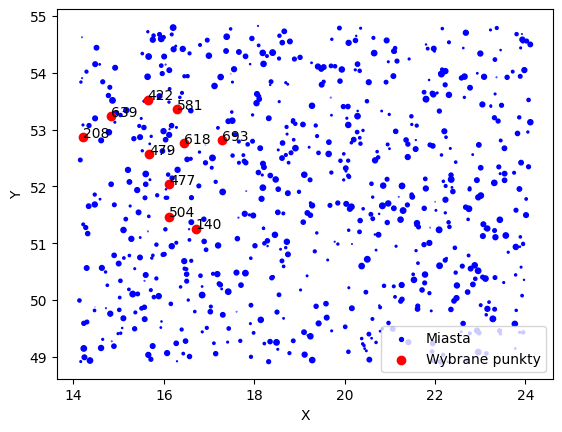

In [66]:
# Współrzędne miast
cities_x = [point[1] for point in data]
cities_y = [point[2] for point in data]

# Populacje miast
populations = [((point[3]*point[3])/25000000000000) for point in data]

# Współrzędne wybranych punktów
selected_x = [data[i-1][1] for i in selected_points]
selected_y = [data[i-1][2] for i in selected_points]

# Skalowanie wielkości punktów proporcjonalnie do populacji
scale_factor = 100  # Wielkość punktów będzie pomnożona przez ten czynnik
sizes = [pop * scale_factor for pop in populations]

# Wykres
plt.scatter(cities_x, cities_y, s=sizes, color='blue', label='Miasta')
plt.scatter(selected_x, selected_y, color='red', label='Wybrane punkty')

# Oznaczenie punktów na wykresie
for i, txt in enumerate(selected_points):
    plt.annotate(txt, (selected_x[i], selected_y[i]))

# Etykiety osi
plt.xlabel('X')
plt.ylabel('Y')

# Legenda
plt.legend()

# Wyświetlenie wykresu
plt.show()

In [67]:
def calculate_path_distance(path):
    distance = 0
    for i in range(len(path) - 1):
        x1, y1 = path[i][0], path[i][1]
        x2, y2 = path[i+1][0], path[i+1][1]
        distance += calculate_distance(x1, y1, x2, y2)
    return distance

def simulated_annealing(selected_coordinates, temperature, cooling_rate):
    current_path = selected_coordinates.copy()
    current_distance = calculate_path_distance(current_path)

    best_path = current_path
    best_distance = current_distance

    while temperature > 0.1:
        # Generowanie nowego sąsiada
        neighbor_path = current_path.copy()
        index1 = random.randint(0, len(neighbor_path) - 1)
        index2 = random.randint(0, len(neighbor_path) - 1)
        neighbor_path[index1], neighbor_path[index2] = neighbor_path[index2], neighbor_path[index1]
        neighbor_distance = calculate_path_distance(neighbor_path)

        # Akceptacja lub odrzucenie nowego rozwiązania
        if neighbor_distance < current_distance:
            current_path = neighbor_path
            current_distance = neighbor_distance
        else:
            probability = math.exp((current_distance - neighbor_distance) / temperature)
            if random.random() < probability:
                current_path = neighbor_path
                current_distance = neighbor_distance

        # Aktualizacja najlepszego rozwiązania
        if current_distance < best_distance:
            best_path = current_path
            best_distance = current_distance

        # Obniżenie temperatury
        temperature *= cooling_rate

    return best_path

# Ustawienia algorytmu
initial_temperature = 1000.0
cooling_rate = 0.95

# Wywołanie algorytmu wyrzażania
best_path = simulated_annealing(selected_coordinates, initial_temperature, cooling_rate)

# Wyświetlenie wyniku
print("Najkrótsza ścieżka:")
for point in best_path:
    print("Współrzędne (X, Y):", point[0], point[1])


Najkrótsza ścieżka:
Współrzędne (X, Y): 17.28172354461134 52.81061812139904
Współrzędne (X, Y): 16.45386677689014 52.7676505862603
Współrzędne (X, Y): 16.28166692624107 53.36159878414311
Współrzędne (X, Y): 15.6398992484498 53.52999399448173
Współrzędne (X, Y): 15.66773051825032 52.57014022575453
Współrzędne (X, Y): 14.21189040029567 52.86381964609848
Współrzędne (X, Y): 14.83601875189825 53.23588219326581
Współrzędne (X, Y): 16.11399218258721 52.03733351353736
Współrzędne (X, Y): 16.11817892330799 51.46891382602072
Współrzędne (X, Y): 16.7033086740962 51.25816696293717


In [68]:
best_path

[[17.28172354461134, 52.81061812139904],
 [16.45386677689014, 52.7676505862603],
 [16.28166692624107, 53.36159878414311],
 [15.6398992484498, 53.52999399448173],
 [15.66773051825032, 52.57014022575453],
 [14.21189040029567, 52.86381964609848],
 [14.83601875189825, 53.23588219326581],
 [16.11399218258721, 52.03733351353736],
 [16.11817892330799, 51.46891382602072],
 [16.7033086740962, 51.25816696293717]]

In [69]:
best_solution

[(504, 16.11817892, 51.46891383, 628335),
 (693, 17.28172354, 52.81061812, 1423575),
 (479, 15.66773052, 52.57014023, 1205896),
 (422, 15.63989925, 53.52999399, 1084131),
 (140, 16.70330867, 51.25816696, 1515700),
 (639, 14.83601875, 53.23588219, 596847),
 (477, 16.11399218, 52.03733351, 1703732),
 (618, 16.45386678, 52.76765059, 1341838),
 (581, 16.28166693, 53.36159878, 843071),
 (208, 14.2118904, 52.86381965, 1708477)]

In [46]:
# data

In [72]:
points_path = []
for i in best_path:
    for j in data:
        if i[0] == j[1] and i[1] == j[2]:
            points_path.append(j[0])
points_path

[693, 618, 581, 422, 479, 208, 639, 477, 504, 140]

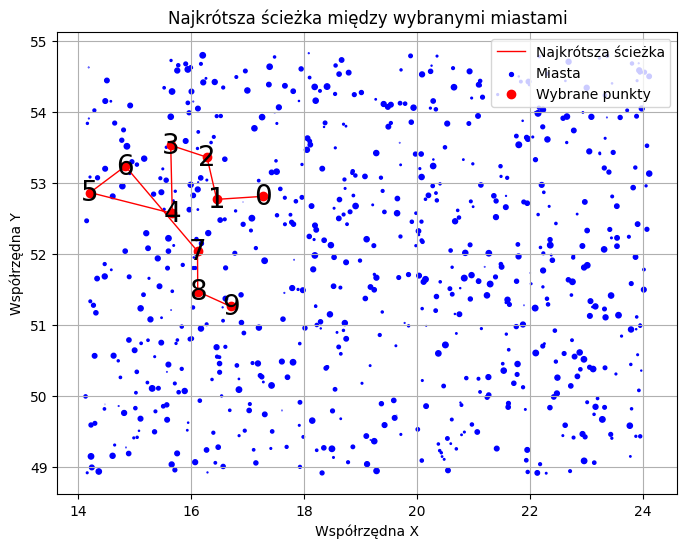

In [73]:
shortest_path = points_path
# Tworzenie list współrzędnych dla wybranych punktów
x_coords = [data[i-1][1] for i in shortest_path]
y_coords = [data[i-1][2] for i in shortest_path]

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, label='Najkrótsza ścieżka')

# Dodawanie numerów krawędzi
for i, city in enumerate(shortest_path):
    x = data[city-1][1]
    y = data[city-1][2]
    plt.text(x, y, str(i), color='black', fontsize=20, verticalalignment='center', horizontalalignment='center')

# Współrzędne miast
cities_x = [point[1] for point in data]
cities_y = [point[2] for point in data]

# Populacje miast
populations = [((point[3]*point[3])/25000000000000) for point in data]

# Współrzędne wybranych punktów
selected_x = [data[i-1][1] for i in selected_points]
selected_y = [data[i-1][2] for i in selected_points]

# Skalowanie wielkości punktów proporcjonalnie do populacji
scale_factor = 100  # Wielkość punktów będzie pomnożona przez ten czynnik
sizes = [pop * scale_factor for pop in populations]

# Wykres
plt.scatter(cities_x, cities_y, s=sizes, color='blue', label='Miasta')
plt.scatter(selected_x, selected_y, color='red', label='Wybrane punkty')
plt.xlabel('Współrzędna X')
plt.ylabel('Współrzędna Y')
plt.title('Najkrótsza ścieżka między wybranymi miastami')
plt.legend()
plt.grid(True)
plt.show()